# Import Libraries

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

# Import dataset

In [78]:
df = pd.read_csv('/content/milknew.csv')
df.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [79]:
df.Grade.unique()

array(['high', 'low', 'medium'], dtype=object)

In [80]:
df['Grade']=df.Grade.replace(['high','medium','low'],[2,1,0])
df.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
5,6.6,37,1,1,1,1,255,2
6,5.5,45,1,0,1,1,250,0
7,4.5,60,0,1,1,1,250,0
8,8.1,66,1,0,1,1,255,0
9,6.7,45,1,1,0,0,247,1


# Ploting parepie and heatmap for the given data

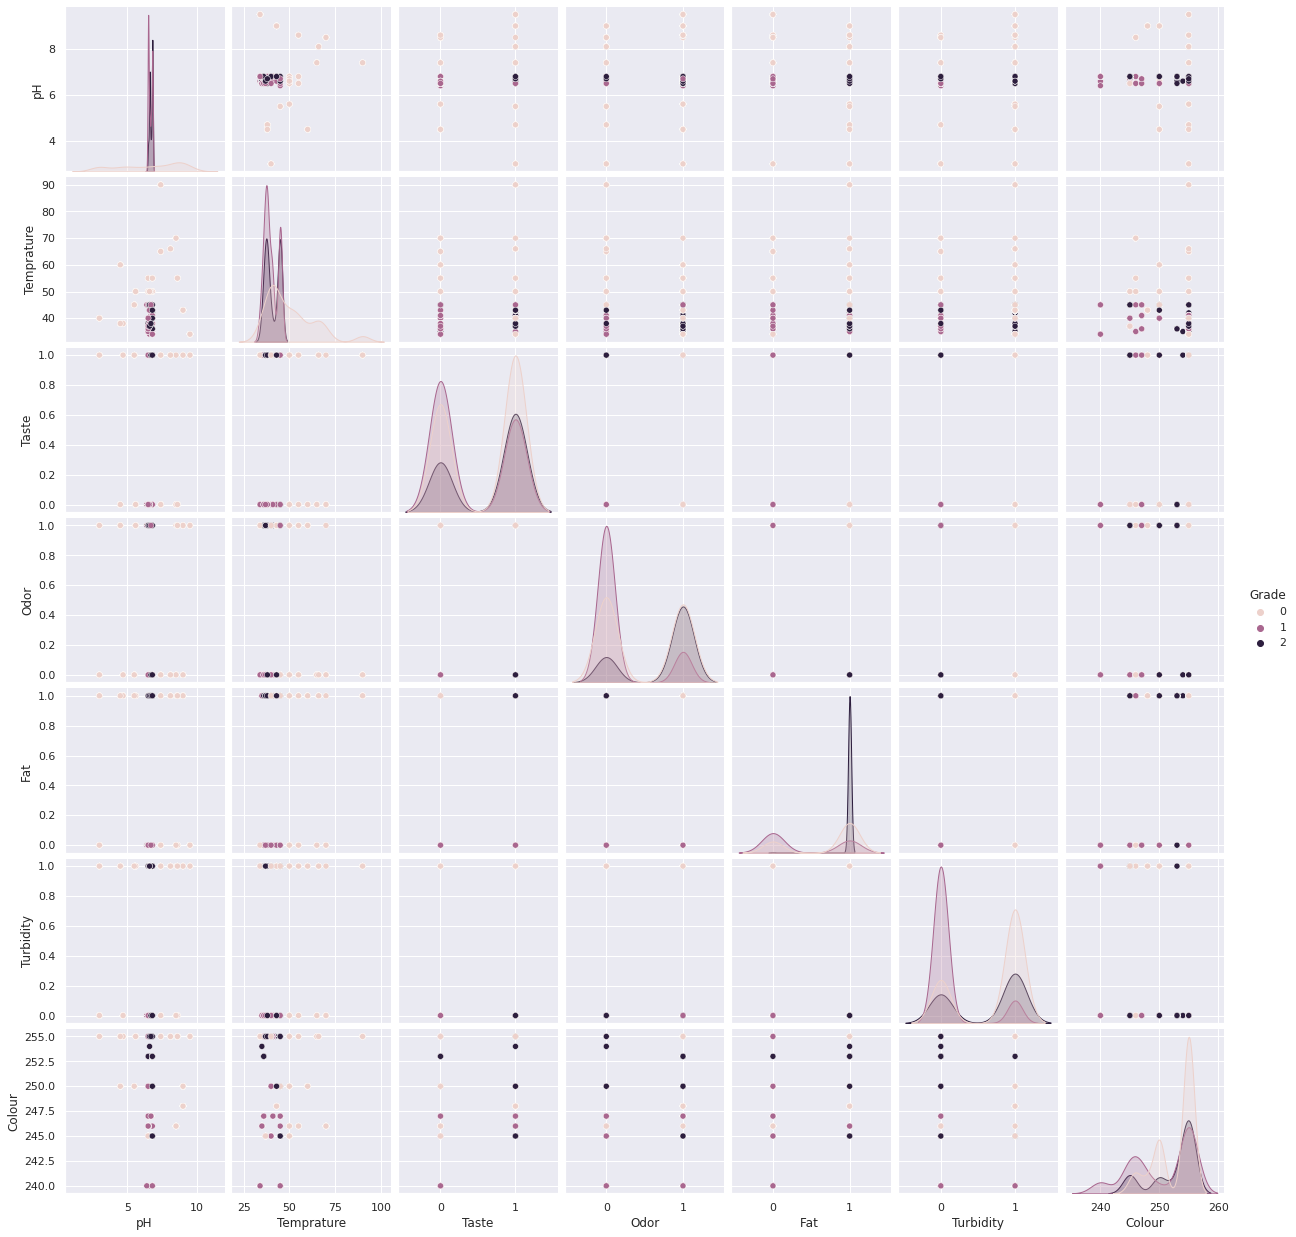

In [81]:
sns.pairplot(df,hue = 'Grade')

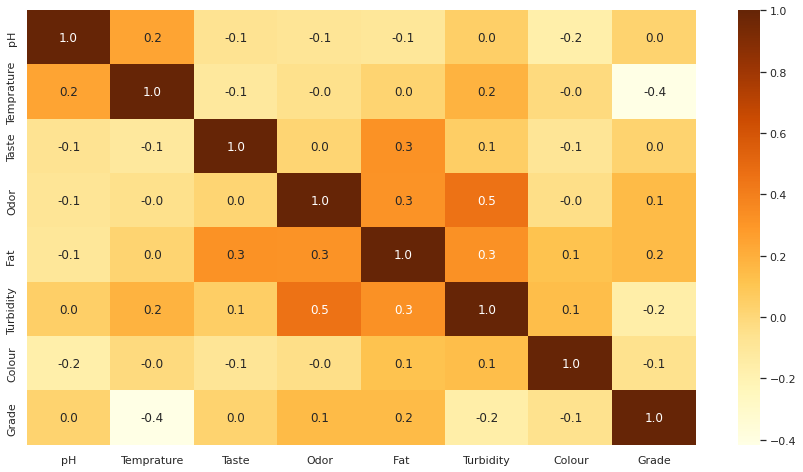

In [82]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='YlOrBr', fmt='.1f')

In [83]:
df.shape

(1059, 8)

In [84]:
x0 = df.drop(['Grade'],axis='columns') 
x0.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [85]:
y0 = df.Grade
y0.head()

0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64

In [86]:
x0.shape

(1059, 7)

# Finding best features

In [87]:
sector = SelectKBest(chi2, k='all')
X_new = sector.fit_transform(x0,y0)
score = sector.scores_

In [88]:
pd.DataFrame(list(zip(df.drop(columns='Grade'),sector.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
1,Temprature,602.216620
5,Turbidity,159.957259
3,Odor,124.472130
4,Fat,87.877498
2,Taste,20.031012
6,Colour,5.214269
0,pH,0.263646


In [105]:
#I tried different combination of feature selection with underwhelming results. Then I used SelectKBest to select the best performing features and got the best results
x = df[['pH', 'Odor', 'Fat ','Taste','Temprature']] 
y = df['Grade']

In [90]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y,test_size=0.20,random_state=0)

# K-Nearest Neighbor

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x, y)
y1_pred = knn_clf.predict(x1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.97      1.00      0.99        77
           2       0.98      0.98      0.98        66

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [92]:
param_range = np.arange(1, 20, 2)
train_score1, test_score1 = validation_curve(KNeighborsClassifier(n_neighbors=5), x, y,param_name = "n_neighbors",param_range = param_range,cv = 5, scoring = "accuracy")

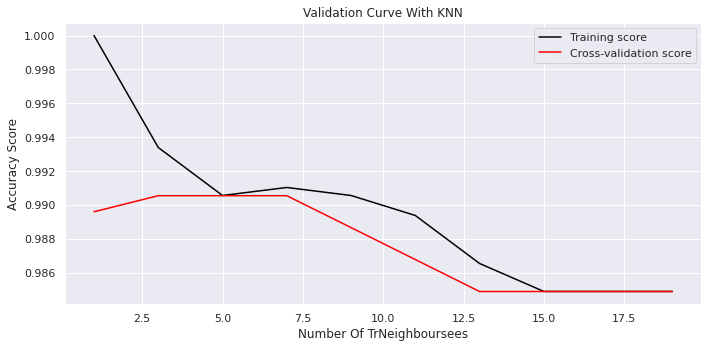

In [93]:
train_mean = np.mean(train_score1, axis=1)
train_std = np.std(train_score1, axis=1)
test_mean = np.mean(test_score1, axis=1)
test_std = np.std(test_score1, axis=1)
plt.subplots(1, figsize=(10,5))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
plt.title("Validation Curve With KNN")
plt.xlabel("Number Of TrNeighboursees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=7, random_state=20)
rf_clf.fit(x, y)
y1_pred = rf_clf.predict(x1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       1.00      1.00      1.00        77
           2       0.99      1.00      0.99        66

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [95]:
param_range = np.arange(1, 100, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=7, random_state=20),x, y, param_name="n_estimators", param_range=param_range,cv=4, scoring="accuracy", n_jobs=-1)

In [96]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

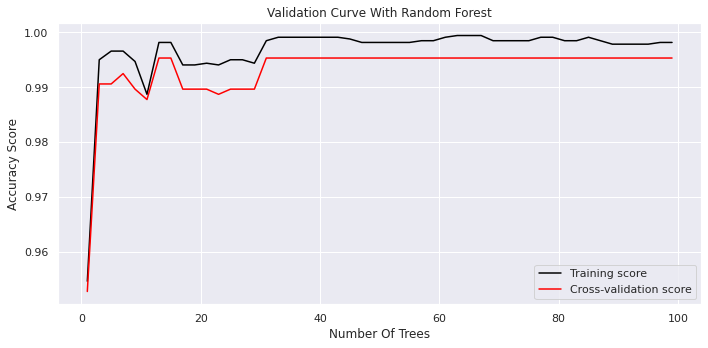

In [97]:
plt.subplots(1, figsize=(10,5))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(x.values, y.values)
y1_pred = dt_clf.predict(x1_test.values)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        66

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [99]:
param_range = np.arange(1, 50, 2)
train_scores2, test_scores2 = validation_curve(DecisionTreeClassifier(random_state=10),x, y, param_name="max_depth", param_range=param_range,cv=4, scoring="accuracy", n_jobs=-1)

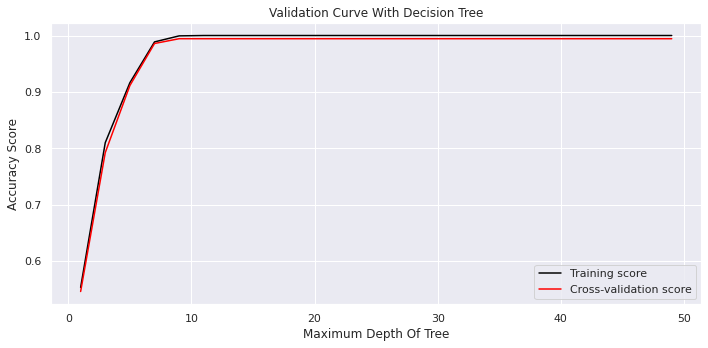

In [100]:
train_mean = np.mean(train_scores2, axis=1)
train_std = np.std(train_scores2, axis=1)
test_mean = np.mean(test_scores2, axis=1)
test_std = np.std(test_scores2, axis=1)
plt.subplots(1, figsize=(10,5))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Maximum Depth Of Tree")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Predicting Milk Quality

In [101]:
def predict_quality(pH,Odor,Fat,Taste,Temprature):    

    x1 = np.zeros(len(x.columns))
    x1[0] = pH
    x1[1] = Odor
    x1[2] = Fat
    x1[3] = Taste
    x1[4] = Temprature

    test = dt_clf.predict([x1])[0]
    if test == 0:
      return("Quality of the milk is Low")
    elif test == 1:
      return("Quality of the milk is Medium")
    else:
      return("Quality of the milk is High")

In [102]:
predict_quality(6.3,0, 1, 1,37)

'Quality of the milk is Medium'

In [103]:
predict_quality(8,0, 0, 1,60)

'Quality of the milk is Low'

In [104]:
predict_quality(6.6,0, 1, 1,30)

'Quality of the milk is High'